In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

In [2]:
messages=[line.rstrip() for line in open('SMSSpamCollection')]

In [3]:
print(len(messages))

5574


In [5]:
messages[12]

'spam\tURGENT! You have won a 1 week FREE membership in our Â£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'

In [6]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('/n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
/n
1 ham	Ok lar... Joking wif u oni...
/n
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
/n
3 ham	U dun say so early hor... U c already then say...
/n
4 ham	Nah I don't think he goes to usf, he lives around here though
/n
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
/n
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
/n
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
/n
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. C

These are tab separated files in which first column is ham/spam

In [7]:
import pandas as pd

In [14]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [15]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [17]:
messages.groupby('label').describe()

message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

Feature Engineering

In [19]:
messages['length']=messages['message'].apply(len)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

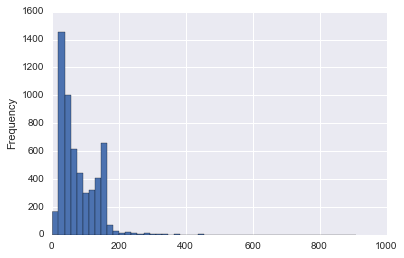

In [21]:
messages['length'].plot.hist(bins=50)

In [22]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

Some of the messages are really large like 910 words. Lets check out what that message represents

In [23]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

This is sort of a love letter 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C13C91F28>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000018C14115DD8>], dtype=object)

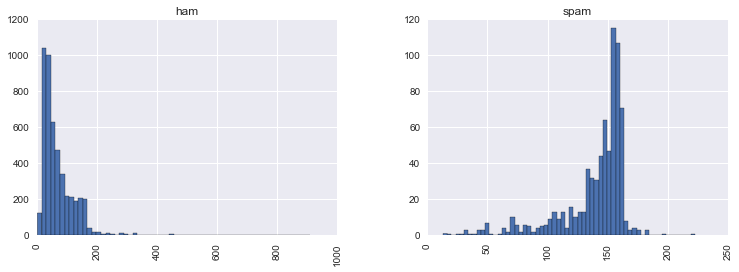

In [24]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

It can be obsereved that SPAM messages generally have more characters

Now we will do feature engineering and use BAG OF WORDS Technique to do analysis

In [31]:
import string

Example for removing the punctuation in a string

In [32]:
mess='Sample message! Notice: it has punctuation'

In [28]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
nopunc=[c for c in mess if c not in string.punctuation]

In [30]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

First of All we want to remove words like a, then, that ,basically grammer

In [34]:
from nltk.corpus import stopwords

In [35]:
nopunc=''.join(nopunc)

In [36]:
nopunc

'Sample message Notice it has punctuation'

See we removed the punctuations 

In [38]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [39]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [40]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

It can be observed that now we have list of words with no punctuation and no grammer words (stop words). Next we write a function for this so that we can be used for the Data Frame

In [41]:
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    
    nopunc=''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]

In [44]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

This is a very simple normalization. There are other libraries which can be used. For example, stemming which is basically- lets say run,ran,running are all same as run. We will do it in Project. Short hand would be a problem though

Now we are gonna follow following process:
1. Count how many times does a word occur in each message(tf)
2. Weight the counts, so that frequent tokens get lower weight (inverse document frequency)
3. Normalize the vectors to unit length, to abstract from original text Length (L2 norm)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

In [47]:
print(len(bow_transformer.vocabulary_))

11425


In [48]:
mess4=messages['message'][3]

In [49]:
print(mess4)

U dun say so early hor... U c already then say...


In [50]:
bow4=bow_transformer.transform([mess4])

In [51]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [52]:
print(bow4.shape)

(1, 11425)


In [54]:
bow_transformer.get_feature_names()[4068]

'U'

In [55]:
messages_bow=bow_transformer.transform(messages['message'])

In [56]:
print('Shape of Sparse Matrix: ',messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [57]:
#Non zero occurences
messages_bow.nnz

50548

In [58]:
#TF IDF

from sklearn.feature_extraction.text import TfidfTransformer

In [60]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [61]:
tfidf4=tfidf_transformer.transform(bow4)

In [62]:
print(tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [63]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [64]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [65]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['label'])

In [67]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [68]:
all_pred=spam_detect_model.predict(messages_tfidf)

In [69]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], 
      dtype='<U4')

Everything above was done training data and hence we won't be able to judge the model. So let's split the data and re do it

In [70]:
from sklearn.cross_validation import train_test_split

In [71]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'],test_size=0.3)

In [72]:
#Instead of doing everything again, in which we have to get rid of punctuation, get rid of stop words, 
# And then do tf and idf we would use Pipelines option

from sklearn.pipeline import Pipeline


In [75]:
pipeline=Pipeline([
        ('bow',CountVectorizer(analyzer=text_process)),
        ('tfidf',TfidfTransformer()),
        ('classifier',MultinomialNB())
    ])

In [76]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000018C1444E598>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [77]:
predicted=pipeline.predict(msg_test)

In [78]:
from sklearn.metrics import classification_report,confusion_matrix

In [80]:
print(classification_report(label_test,predicted),confusion_matrix(label_test,predicted))

             precision    recall  f1-score   support

        ham       0.95      1.00      0.97      1439
       spam       1.00      0.65      0.79       233

avg / total       0.95      0.95      0.95      1672
 [[1439    0]
 [  81  152]]
